In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from planar_utils import sigmoid,load_extra_datasets,load_planar_dataset,plot_decision_boundary
%load_ext autoreload
%autoreload 2

In [2]:
X,Y=load_planar_dataset()

In [7]:
X

array([[ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,
         3.49178475e-01,  6.94150378e-01,  1.62065038e+00,
         1.53856225e+00,  3.63085641e-02,  4.74591109e-01,
         1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
         2.61695163e-01,  2.31614896e-01,  1.58013020e+00,
         6.35509950e-03,  6.80610419e-01,  1.21400432e-01,
         1.13281261e+00,  1.61505892e+00,  1.66454441e-01,
         1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
         1.54661332e+00,  9.84590400e-01,  1.45313345e+00,
         7.49043388e-01,  1.45048341e+00,  1.64287865e+00,
         1.28141487e+00,  1.59574104e+00,  1.46298294e+00,
         1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
         1.22995404e+00,  1.31142345e+00, -1.99364553e+00,
         3.94564752e-01,  1.51715449e+00,  1.69169139e+00,
         1.74186686e+00, -2.91373382e+00,  7.52150898e-01,
         1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
         3.52484080e-01, -1.48694206e+00, -7.45290416e-0

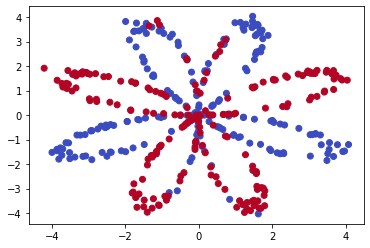

In [6]:
plt.scatter(X[0][:],X[1][:],c=Y,cmap='coolwarm')

In [9]:
m=X.shape[1]
X_shape=X.shape
y_shape=Y.shape

print('no of training examples:'+str(m))
print('Shape of X:'+str(X_shape))
print('Shape of Y:'+str(y_shape))

no of training examples:400
Shape of X:(2, 400)
Shape of Y:(1, 400)


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log_reg=LogisticRegression()

In [16]:
log_reg.fit(X.T,Y.T)

D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


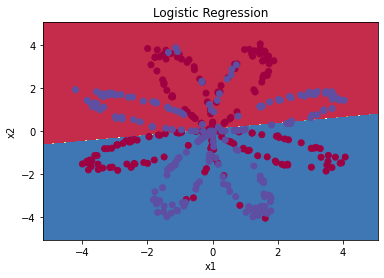

In [18]:
plot_decision_boundary(lambda x: log_reg.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = log_reg.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [20]:
def layer_sizes(X,Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    
    return n_x,n_h,n_y

In [21]:
def initialize_param(n_x,n_h,n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    parameters={'W1':W1,
               'b1':b1,
               "W2":W2,
               "b2":b2}
    return parameters

In [24]:
def forward_propagation(X,parameters):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    cache={'Z1':Z1,
          'A1':A1,
          'Z2':Z2,
          "A2":A2}
    
    return A2,cache

In [25]:
def compute_cost(A2,Y):
    m=A2.shape[1]
    
    cost=-np.sum(np.multiply(Y,np.log(A2))+np.multiply(1-Y,np.log(1-A2)))/m
    
    cost=float(np.squeeze(cost))
    
    return cost

In [27]:
def backward_propagation(X,Y,parameters,cache):
    m=X.shape[1]
    
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    
    Z1=cache['Z1']
    A1=cache['A1']
    Z2=cache['Z2']
    A2=cache['A2']
    
    dZ2=A2-Y
    dW2=np.dot(dZ2,A1.T)/m
    db2=np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1=np.dot(W2.T,dZ2)*(1-(A1*A1))
    dW1=np.dot(dZ1,X.T)/m
    db1=np.sum(dZ1,axis=1,keepdims=True)/m
    
    grads={'dW1':dW1,
          "db1":db1,
          "dW2":dW2,
          "db2":db2}
    
    return grads

In [32]:
def optimize(parameters,grads,learning_rate=0.05):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    
    dW1=grads['dW1']
    db1=grads['db1']
    dW2=grads['dW2']
    db2=grads['db2']
    
    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    W2=W2-learning_rate*dW2
    b2=b2-learning_rate*db2
    
    parameters={'W1':W1,
               'b1':b1,
               'W2':W2,
               'b2':b2}
    
    return parameters

In [33]:
def nn_model(X,Y,n_h,num_iterations=1000,learning_rate=0.09,print_cost=False):
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    parameters=initialize_param(n_x,n_h,n_y)
    for i in range(0,num_iterations):
        A2,cache=forward_propagation(X,parameters)
        cost=compute_cost(A2,Y)
        grads=backward_propagation(X,Y,parameters,cache)
        parameters=optimize(parameters,grads,learning_rate=learning_rate)
        
        if print_cost and i%1000==0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [34]:
def predict(parameters,X):
    A2,cache=forward_propagation(X,parameters)
    predictions=np.zeros((1,A2.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]>0.5:
            predictions[0,i]=1
        else:
            predictions[0,i]=0
    
    return predictions

In [39]:
parameters=nn_model(X,Y,5,num_iterations=20000,learning_rate=0.5,print_cost=True)

Cost after iteration 0: 0.693184
Cost after iteration 1000: 0.304002
Cost after iteration 2000: 0.288878
Cost after iteration 3000: 0.281582
Cost after iteration 4000: 0.275832
Cost after iteration 5000: 0.270792
Cost after iteration 6000: 0.266785
Cost after iteration 7000: 0.263521
Cost after iteration 8000: 0.260760
Cost after iteration 9000: 0.258380
Cost after iteration 10000: 0.256311
Cost after iteration 11000: 0.254503
Cost after iteration 12000: 0.252911
Cost after iteration 13000: 0.251498
Cost after iteration 14000: 0.250224
Cost after iteration 15000: 0.249030
Cost after iteration 16000: 0.246818
Cost after iteration 17000: 0.226366
Cost after iteration 18000: 0.222398
Cost after iteration 19000: 0.220231


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 5')

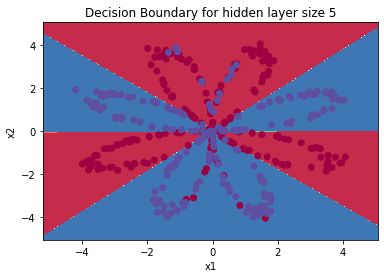

In [46]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(5))